### Driver Maneuver Event Prediction

#### Using Think aloud protocol dataset

This project aims to predict driver maneuver events at roundabouts using a dataset that captures various features related to vehicle dynamics, driver verbalizations, and environmental factors. The dataset includes a mix of numerical, categorical, and temporal data, requiring preprocessing and feature engineering to ensure optimal model performance.

****Dataset Details:****
-  **Source:** __[Think Aloud Driver Data](https://github.com/BorjaUEM/Think-Aloud-Data/blob/main/Roundabout-dataset.csv)


#### Import libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings("ignore")

#### Load 'Think Aloud Dataset' and store it in a dataframe

In [5]:
data = pd.read_csv('Roundabout-dataset.csv', sep =';')

In [6]:
data.head()

,Roundabout_ID,Maneuver_ID,Date,Verbalization,Exit,Event,DistNaNY,SpeedNaNV,Speed-L,Section,Dist_PVL,Dist_PVN,Dist_YL,Dist_YN,Dist_Yat,Lz,Cz,Rz,LL,RL
0,M40,1,2021-05-06,mantengo la velocidad,4,T-HOLD,270.0,63.08,70,Approach,1,0,0,0,0,0,0,0,0,0
1,M40,1,2021-05-06,cambio a tercera,4,GD,260.0,60.23,70,Approach,1,0,0,0,0,0,0,0,0,1
2,M40,1,2021-05-06,levanto el pie del acelerador,4,T-OFF,250.0,59.53,70,Approach,0,1,0,0,0,0,0,0,0,0
3,M40,1,2021-05-06,cambio a segunda,4,GD,79.0,40.87,40,Approach,0,1,1,0,0,0,0,0,0,0
4,M40,1,2021-05-06,intermitente a la izquierda,4,LB-ON,33.0,25.01,40,Approach,1,0,0,1,0,0,0,0,0,0


#### View info of the dataset

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Roundabout_ID  689 non-null    object 
 1   Maneuver_ID    689 non-null    int64  
 2   Date           689 non-null    object 
 3   Verbalization  689 non-null    object 
 4   Exit           689 non-null    int64  
 5   Event          689 non-null    object 
 6   DistNaNY       282 non-null    float64
 7   SpeedNaNV      683 non-null    float64
 8   Speed-L        685 non-null    object 
 9   Section        689 non-null    object 
 10  Dist_PVL       689 non-null    int64  
 11  Dist_PVN       689 non-null    int64  
 12  Dist_YL        689 non-null    object 
 13  Dist_YN        689 non-null    int64  
 14  Dist_Yat       689 non-null    int64  
 15  Lz             689 non-null    int64  
 16  Cz             689 non-null    int64  
 17  Rz             689 non-null    int64  
 18  LL        

In [9]:
data.shape

(689, 20)

In [10]:
data.columns

Index(['Roundabout_ID', 'Maneuver_ID', 'Date', 'Verbalization', 'Exit',
       'Event', 'DistNaNY', 'SpeedNaNV', 'Speed-L', 'Section', 'Dist_PVL',
       'Dist_PVN', 'Dist_YL', 'Dist_YN', 'Dist_Yat', 'Lz', 'Cz', 'Rz', 'LL',
       'RL'],
      dtype='object')

#### View basic statistical information about the dataset

In [12]:
data.describe()

,Maneuver_ID,Exit,DistNaNY,SpeedNaNV,Dist_PVL,Dist_PVN,Dist_YN,Dist_Yat,Lz,Cz,Rz,LL,RL
count,689.000000,689.000000,282.000000,683.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000
mean,15.447025,3.454282,78.117021,36.509524,0.313498,0.275762,0.117562,0.130624,0.034833,0.017417,0.036284,0.017417,0.030479
std,8.714322,0.948384,75.937114,35.333805,0.464252,0.447222,0.322322,0.337234,0.183490,0.130913,0.187133,0.130913,0.172026
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,3.000000,17.250000,25.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15.000000,4.000000,47.500000,30.680000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,23.000000,4.000000,120.000000,45.970000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30.000000,4.000000,300.000000,872.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Check for any null values

In [14]:
data.isna().sum()

Roundabout_ID      0
Maneuver_ID        0
Date               0
Verbalization      0
Exit               0
Event              0
DistNaNY         407
SpeedNaNV          6
Speed-L            4
Section            0
Dist_PVL           0
Dist_PVN           0
Dist_YL            0
Dist_YN            0
Dist_Yat           0
Lz                 0
Cz                 0
Rz                 0
LL                 0
RL                 0
dtype: int64

#### Fill all null objects with 'Unknown'

In [16]:
data[['DistNaNY','SpeedNaNV']] = data[['DistNaNY','SpeedNaNV']].fillna(data[['DistNaNY','SpeedNaNV']].mean())

In [17]:
data.isna().sum()

Roundabout_ID    0
Maneuver_ID      0
Date             0
Verbalization    0
Exit             0
Event            0
DistNaNY         0
SpeedNaNV        0
Speed-L          4
Section          0
Dist_PVL         0
Dist_PVN         0
Dist_YL          0
Dist_YN          0
Dist_Yat         0
Lz               0
Cz               0
Rz               0
LL               0
RL               0
dtype: int64

In [18]:
data.fillna('Unknown',inplace = True)
data.isna().sum()

Roundabout_ID    0
Maneuver_ID      0
Date             0
Verbalization    0
Exit             0
Event            0
DistNaNY         0
SpeedNaNV        0
Speed-L          0
Section          0
Dist_PVL         0
Dist_PVN         0
Dist_YL          0
Dist_YN          0
Dist_Yat         0
Lz               0
Cz               0
Rz               0
LL               0
RL               0
dtype: int64

#### Visualization

Text(0, 0.5, 'count')

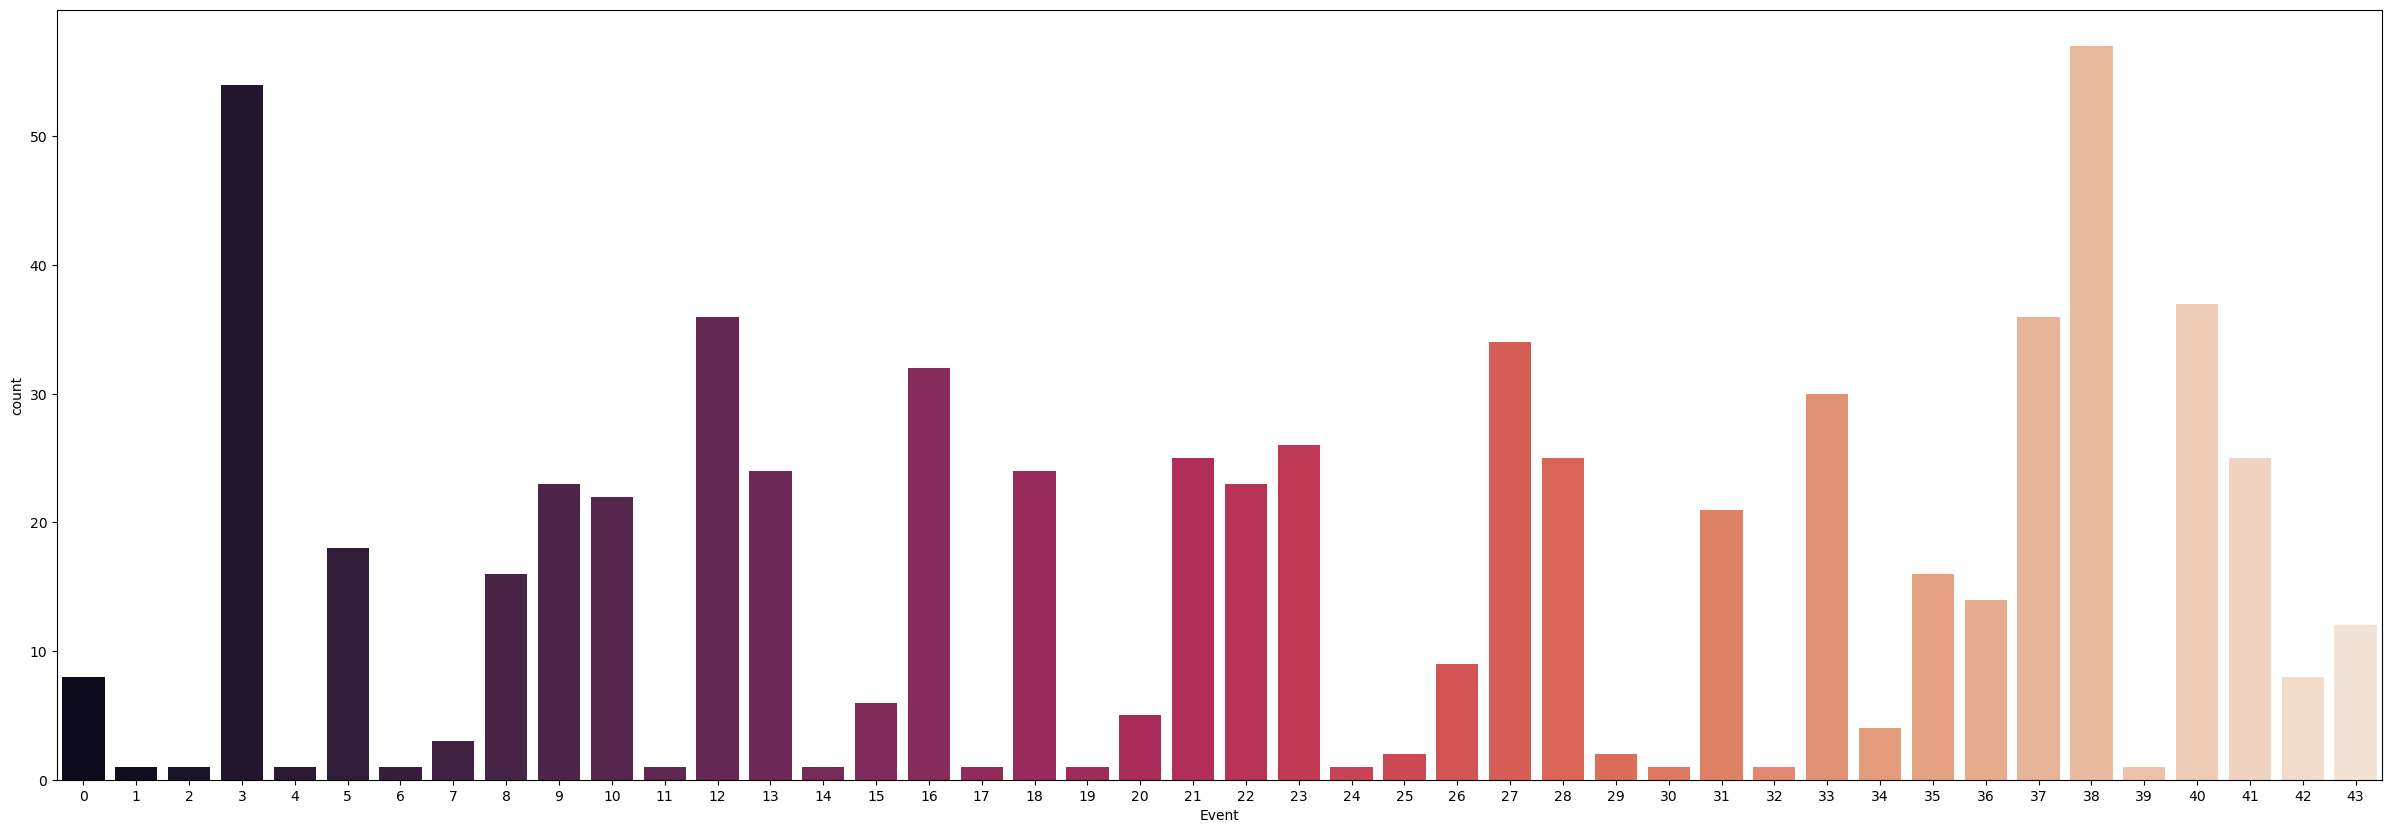

In [123]:
plt.figure(figsize =(30,10))
sns.countplot(data = data, x = 'Event', palette = 'rocket')
plt.xlabel('Event')
plt.ylabel('count')

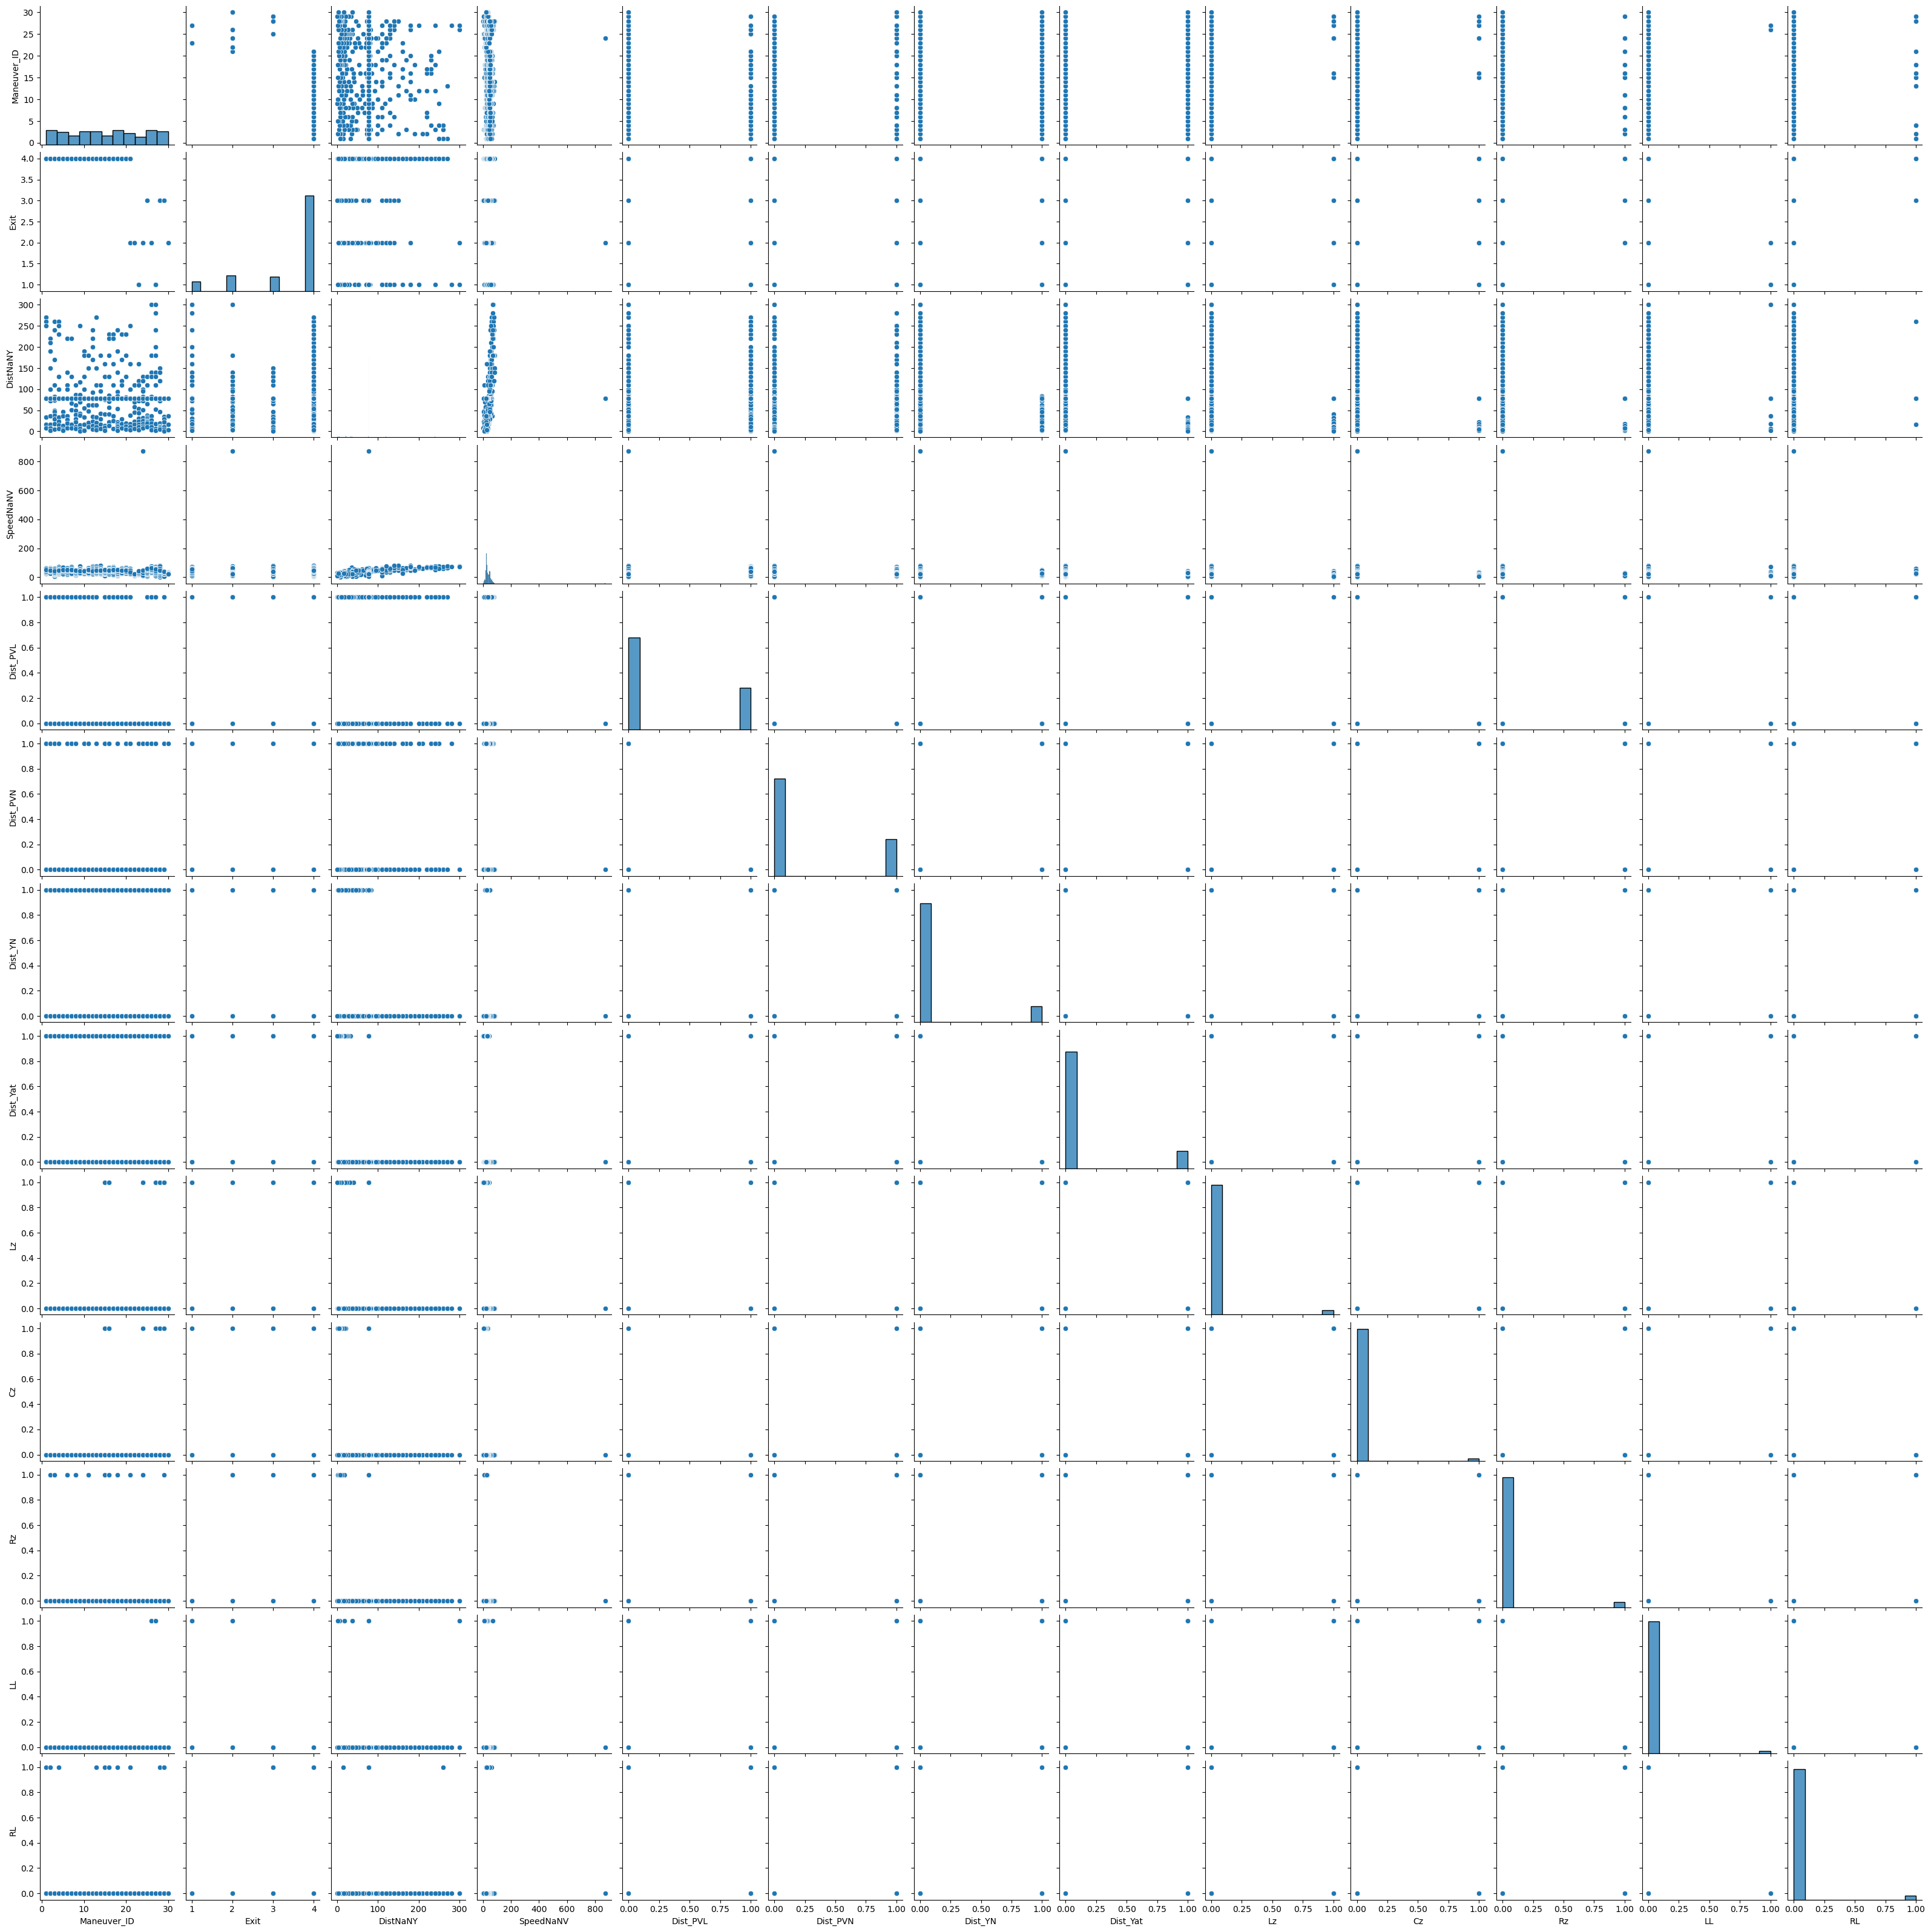

In [21]:
sns.pairplot(data= data)

#### Preprocessing

In [23]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [24]:
encoder = LabelEncoder()
data['Roundabout_ID'] = encoder.fit_transform(data['Roundabout_ID'])
data['Section'] = encoder.fit_transform(data['Section'])
data['Verbalization'] = encoder.fit_transform(data['Verbalization'])
data['Event'] = encoder.fit_transform(data['Event'])


****Date format****

In [26]:
data['Date'] = pd.to_datetime(data['Date']) 

In [27]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

In [28]:
data = data.drop(columns=['Date'])

****Converting to numerical dtype****

In [30]:
data['Speed-L'] = pd.to_numeric(data['Speed-L'], errors='coerce')  
data['Dist_YL'] = pd.to_numeric(data['Dist_YL'], errors='coerce')

In [31]:
data['Speed-L'].fillna(data['Speed-L'].mean(), inplace=True)
data['Dist_YL'].fillna(data['Dist_YL'].mean(), inplace=True)

#### Split the dataset into input and target variables

In [33]:
X = data.drop(columns = ['Event'])
y = data['Event']

#### Split the dataset into Training and Testing set

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 100)

#### Check the shape of X_train and X_test

In [38]:
X_train.shape

(551, 21)

In [39]:
X_test.shape

(138, 21)

In [40]:
print(X_train.dtypes)


Roundabout_ID      int32
Maneuver_ID        int64
Verbalization      int32
Exit               int64
DistNaNY         float64
SpeedNaNV        float64
Speed-L          float64
Section            int32
Dist_PVL           int64
Dist_PVN           int64
Dist_YL          float64
Dist_YN            int64
Dist_Yat           int64
Lz                 int64
Cz                 int64
Rz                 int64
LL                 int64
RL                 int64
Year               int32
Month              int32
Day                int32
dtype: object


#### Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
lr = LogisticRegression()

In [44]:
lr.fit(X_train,y_train)

LogisticRegression()

In [104]:
print("Accuracy score of the model:",lr.score(X_train,y_train))

Accuracy score of the model: 0.39019963702359345


In [106]:
y_pred = lr.predict(X_test)
print("Accuracy score of the predicted model:",metrics.accuracy_score(y_test,y_pred))

Accuracy score of the predicted model: 0.35507246376811596


In [110]:
print("Classification Report:\n", metrics.classification_report(y_test,y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           3       0.42      0.80      0.55        10
           5       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         5
          10       0.00      0.00      0.00         6
          12       0.50      0.70      0.58        10
          13       0.00      0.00      0.00         5
          15       0.00      0.00      0.00         1
          16       1.00      0.33      0.50         9
          18       0.00      0.00      0.00         4
          20       0.00      0.00      0.00         1
          21       0.38      1.00      0.55         3
          22       0.00      0.00      0.00         7
          23       0.33      0.14      0.20         7
          26       0.00      0.00      0.00         1
   

<Axes: >

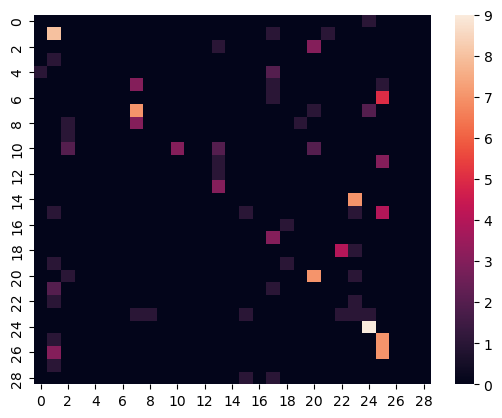

In [112]:
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot = False)

In [127]:
from sklearn.model_selection import cross_val_score

In [131]:
logistic_score = cross_val_score(lr, X, y, cv=5)

In [133]:
mean_score = logistic_score.mean()
print("Mean of cross validation score is: ",mean_score)

Mean of cross validation score is:  0.4150957368031313


#### Create Random Forest model

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
model = RandomForestClassifier(n_estimators = 100)

#### Train the model with X_train and y_train

In [49]:
model.fit(X_train,y_train)

RandomForestClassifier()

#### Check the score of our trained model

In [51]:
model.score(X_train,y_train)

1.0

#### Make predictions with X_test

In [53]:
y_pred = model.predict(X_test)

#### Check the acccuracy score of our prediction

In [55]:
from sklearn import metrics

In [56]:
metrics.accuracy_score(y_test,y_pred)

0.6231884057971014

#### Create a classification report

In [119]:
print("Classification Report:\n", metrics.classification_report(y_test,y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           3       0.42      0.80      0.55        10
           5       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         5
          10       0.00      0.00      0.00         6
          12       0.50      0.70      0.58        10
          13       0.00      0.00      0.00         5
          15       0.00      0.00      0.00         1
          16       1.00      0.33      0.50         9
          18       0.00      0.00      0.00         4
          20       0.00      0.00      0.00         1
          21       0.38      1.00      0.55         3
          22       0.00      0.00      0.00         7
          23       0.33      0.14      0.20         7
          26       0.00      0.00      0.00         1
   

#### Plotting confusion matrix on heatmap

<Axes: >

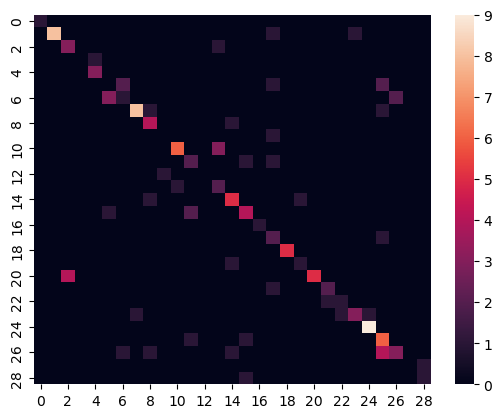

In [60]:
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot = False)

In [135]:
rf_score = cross_val_score(model, X, y, cv=5)

In [137]:
mean_score_rf = rf_score.mean()
print("Mean of Cross validation score is:",mean_score_rf)

Mean of Cross validation score is: 0.5498466095419444


In [178]:
joblib.dump(model, 'random_forest_model.pkl')

['random_forest_model.pkl']

#### Support Vector Machine

In [140]:
from sklearn.svm import SVC

In [142]:
svm = SVC()

In [144]:
svm.fit(X_train,y_train)

SVC()

In [146]:
print("Score of our trained model is :",svm.score(X_train, y_train))

Score of our trained model is : 0.08711433756805807


In [148]:
y_pred = svm.predict(X_test)

In [150]:
print("Accuracy score of our prediction is:",metrics.accuracy_score(y_test,y_pred))

Accuracy score of our prediction is: 0.06521739130434782


Confusion matrix:
 [[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  10  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   4  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   3  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   5  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   6  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  10  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   5  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

<Axes: >

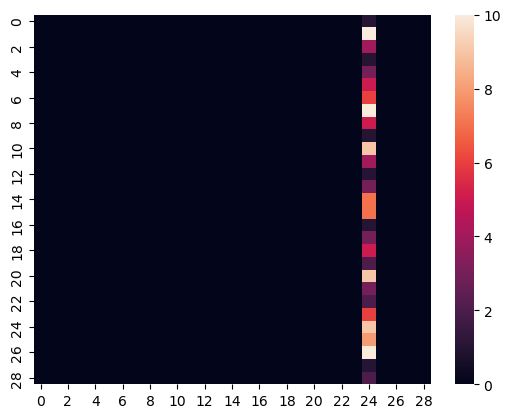

In [156]:
print("Confusion matrix:\n", metrics.confusion_matrix(y_test, y_pred))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred),annot = False)

In [158]:
print("Classification report is:\n", metrics.classification_report(y_test,y_pred))

Classification report is:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           3       0.00      0.00      0.00        10
           5       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         5
          10       0.00      0.00      0.00         6
          12       0.00      0.00      0.00        10
          13       0.00      0.00      0.00         5
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         9
          18       0.00      0.00      0.00         4
          20       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         3
          22       0.00      0.00      0.00         7
          23       0.00      0.00      0.00         7
          26       0.00      0.00      0.00         1


In [160]:
svm_score = cross_val_score(svm, X, y, cv=5)

In [162]:
mean_score_svm = svm_score.mean()
print("Mean of Cross validation score is:", mean_score_svm)

Mean of Cross validation score is: 0.08272506082725062


#### Assign cross val scores of all models into a dataframe

In [165]:
cv_scores_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Support Vector Machine'],
    'Scores': [mean_score, mean_score_rf, mean_score_svm]
})

In [167]:
cv_scores_df

,Model,Scores
0,Logistic Regression,0.415096
1,Random Forest,0.549847
2,Support Vector Machine,0.082725
